In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib.cm import viridis
from matplotlib.cm import rainbow
from matplotlib.colors import to_hex
import json
from matplotlib.patches import Circle
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from PIL import Image
import requests 
import urllib 
import codecs

from six.moves.urllib.request import urlopen
import numpy as np
from googletrans import Translator
translator = Translator()


In [2]:
df= pd.read_csv('C:/python/china/abcd.csv',sep=';')
df.head()

Sector  Cat
0  Agriculture, forestry, animal husbandry and fi...    0
1                               Coal mining products    0
2                    Oil and gas production products    0
3                             Metal mineral products    0
4   Non-metallic minerals and other mineral products    0

In [3]:
ddd=dict(list(np.array(df)))

In [4]:
def I(mas,rez):
    q1=mas[0]/(mas[0]+mas[1])*100
    q2=mas[2]/(mas[1]+mas[2])*100
    q3=mas[3]/(mas[3]+mas[2])*100
    q4=mas[3]/(mas[3]+mas[0])*100
    A1=100-0
    B1=-q1+q3
    C1=-q1*0+q3*100
    A2=q2-q4
    B2=0-100
    C2=0*q2-100*q4
    M=np.linalg.solve([[A1,B1],[A2,B2]],[C1,C2])
    a=np.sqrt((q1-M[0])**2+(100-M[1])**2)
    b=np.sqrt((100-M[0])**2+(q2-M[1])**2)
    c=np.sqrt((q3-M[0])**2+(0-M[1])**2)
    d=np.sqrt((0-M[0])**2+(q4-M[1])**2)
    T=a+b+c+d
    if rez:
        return [1/(T*(1/a+1/b+1/c+1/d)-15),a,b,c,d]
    else:
        return 1/(T*(1/a+1/b+1/c+1/d)-15)
        


In [5]:
def II(mas,rez=False):
    a=[]
    b=[]
    for el in range(4):
        a.append(I(mas[el],rez))
        b.append(I(mas.T[el],rez))
    return np.array([b,a])

In [6]:
II(np.array([[1,2,3,7],[4,5,6,3],[7,8,9,3],[5,4,3,2]]))

array([[0.13154304, 0.30425172, 0.37595327, 0.60836421],
       [0.24371754, 0.68443944, 0.39238628, 0.54062225]])

In [7]:
df2012=pd.read_csv('c:/python/china_regions.csv',sep=';',decimal=',',header=None)
df2012.head()

0     1             2             3        4            5           6     \
0   NaN   NaN       1.00000  1.000000e+00  1.00000      1.00000     1.00000   
1   NaN   NaN       1.00000  2.000000e+00  3.00000      4.00000     5.00000   
2   1.0   1.0  264590.66574  1.507168e+02  0.30721     13.30811    23.81666   
3   1.0   2.0   26828.17785  4.617159e+06  0.00000  40065.39061  2163.99041   
4   1.0   3.0       0.00000  0.000000e+00  0.14803      0.00000     0.45927   

           7            8           9     ...          1453       1454  \
0       1.00000      1.00000     1.00000  ...      30.00000   31.00000   
1       6.00000      7.00000     8.00000  ...     202.00000  101.00000   
2  629073.93861  16615.16420  3163.96014  ...  -15298.11812   11.87964   
3   16504.88172    991.63699  2742.45258  ...   -4460.18589  405.14386   
4       0.00000      0.00000     0.00000  ...     -39.41060    0.00000   

        1455       1456       1457         1458          1459          1460  \
0   31.00000   31.00000   31.00000     31.00000           NaN           NaN   
1  102.00000  103.00000  201.00000    202.00000           NaN           NaN   
2   27.24035    1.42322    2.70425 -62110.13279  306046.93224  -34469.73960   
3  109.93942    0.00000    0.00000  -2566.09193  384779.93468 -407877.80901   
4    0.00000    0.00000    0.00000 -33057.98993  639215.60462   -1322.00013   

   1461  1462  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  

[5 rows x 1463 columns]

In [8]:
regions=['Beijing','Tianjin','Hebei','Shanxi','Inter-Mongolia','Liaoning','Jilin','Hei Longjiang','Shanghai','Jiangsu',
         'Zhejiang','Anhi','Fujian','Jiangxi','Shandong','Hennan','Hubei','Hunan','Guangdong','Guangxi','Hainan','Chongqing',
         'Sichuan','Guizhou','Yunnan','XiZang-Tibet','Shan`xi','Gansu','Qinghai','Ningxia','Xinjiang']
industries=['Agri','CoalM','OilgasM','MetM','NMetM','Food','Tex','Cloth','Wood','Paper','Fuel','Chemi','NonMetP','MetSm',
            'MetInd','General','Special','TransEq','Electri','ComEq','Instr','OtherM','Waste','EquiRepair','ElectriH','GasPS',
            'WaterPS','Buliding','WhSR','Trans','Accom','Inform','Fin','Estate','Rental','Science','Cons','ResS','Edu',
            'Health','Culture','PublA']
IndCat=np.array(df.Cat[:42])
IndCat

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int64)

In [9]:
names3=['Xinjiang Uygur Autonomous Region','Tibet Autonomous Region','Inner Mongolia Autonomous Region',
        'Qinghai Province','Sichuan Province','Heilongjiang Province','Gansu province','Yunnan Province',
        'Guangxi Zhuang Autonomous Region','Hunan Province','Shaanxi Province','Guangdong Province','Jilin Province',
        'Hebei Province','Hubei Province','Guizhou Province','Shandong Province','Jiangxi Province','Henan Province',
        'Liaoning Province','Shanxi Province','Anhui Province','Fujian Province','Zhejiang Province','Jiangsu Province',
        'Chongqing','Ningxia Hui Autonomous Region','Hainan','Taiwan Province','Beijing','Tianjin','Shanghai',
        'Hong Kong Special Administrative Region','Macao Special Administrative Region']

In [10]:
mas=np.array(df2012)
mas1=mas[2:31*42+2,2:31*42+2]
mas2=np.sum(mas[2:-41,2:31*42+2],axis=0)
mas3=np.sum(mas[2:31*42+2,2:-2],axis=1)
print(np.sum(mas2),np.sum(mas3))

17091981438.34806 17091981438.006538


In [11]:
rrr=np.array([el // 42 for el in range(31*42)])
rrr

array([ 0,  0,  0, ..., 30, 30, 30])

In [12]:
print(2012)
aa=[]
bb=[]
dd=[]
for el in range(31):
    print(regions[el])
    mmm=np.zeros((4,4))
    for xx1 in range(3):
        for xx2 in range(3):
            mmm[xx1,xx2]=np.sum(mas1[(rrr==el)][IndCat==xx1].T[(rrr==el)][IndCat==xx2].T)
    for xx1 in range(3):
        mmm[xx1,3]=mas2[rrr==el][IndCat==xx1].sum()-mmm.sum(axis=1)[xx1]
        mmm[3,xx1]=mas2[rrr==el][IndCat==xx1].sum()-mmm.sum(axis=0)[xx1]
    mmm[3,3]=mas2[rrr==el].sum()-mmm.sum()
    dd.append(II(mmm))
    print(II(mmm))
    aa.append(II(mmm).max(axis=1)/II(mmm).min(axis=1))
    bb.append(II(mmm).max(axis=1))
    print(II(mmm).max(axis=1)/II(mmm).min(axis=1))

2012
Beijing
[[0.35209931 0.04311763 0.03109622 0.02391033]
 [0.26141671 0.08254943 0.05677949 0.01362969]]
[14.72582376 19.17994554]
Tianjin
[[0.14362366 0.38857731 0.06903097 0.19922187]
 [0.12798533 0.36816452 0.07958404 0.18408938]]
[5.62902909 4.62610998]
Hebei
[[0.1062376  0.44002568 0.09334992 0.39099999]
 [0.04776964 0.88047299 0.22236067 0.30071054]]
[ 4.71372338 18.43164507]
Shanxi
[[0.49768012 0.78806693 0.10729196 0.14646649]
 [0.09987186 0.41877295 0.63669434 0.15255658]]
[7.34506985 6.37511247]
Inter-Mongolia
[[0.13807895 0.59451013 0.14882819 0.26513333]
 [0.07372316 0.84805721 0.41293882 0.17880925]]
[ 4.30558114 11.50326703]
Liaoning
[[0.11565994 0.61634683 0.15272949 0.480161  ]
 [0.10883059 0.59301618 0.18433105 0.31417213]]
[5.32895686 5.44898429]
Jilin
[[0.0969489  0.83614911 0.35662084 0.36773618]
 [0.12803013 0.73664266 0.29964541 0.31116026]]
[8.62463755 5.75366629]
Hei Longjiang
[[0.10225789 0.89000008 0.12064526 0.13130433]
 [0.05420065 0.88668571 0.30972957 0

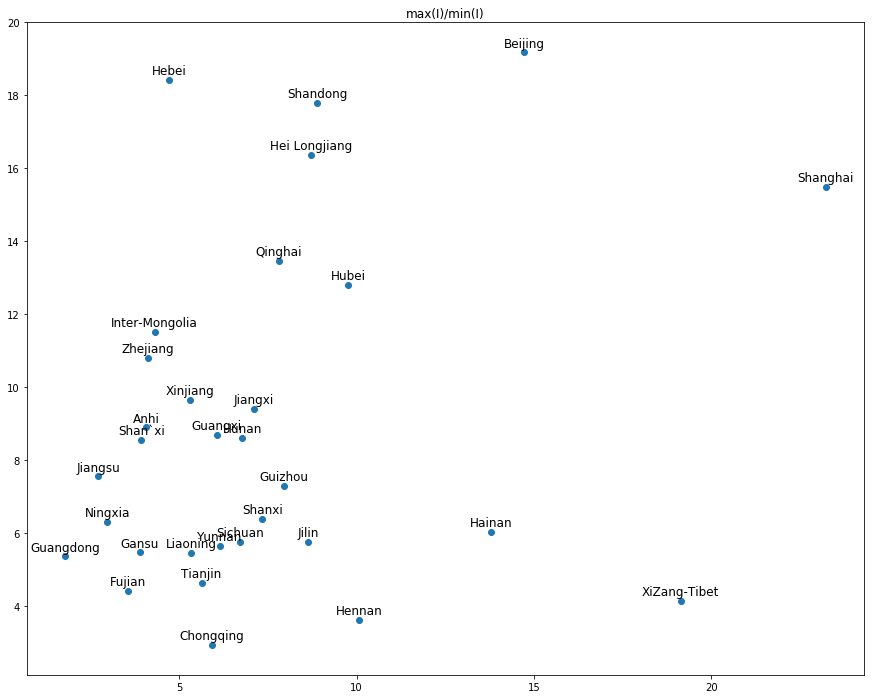

In [12]:
plt.figure(figsize=(15,12))
plt.title('max(I)/min(I)')
plt.scatter(np.array(aa).T[0],np.array(aa).T[1])
for el in range(31):
    plt.text(aa[el][0],aa[el][1]+0.15,regions[el], horizontalalignment='center',fontsize=12,color='black')

plt.show()

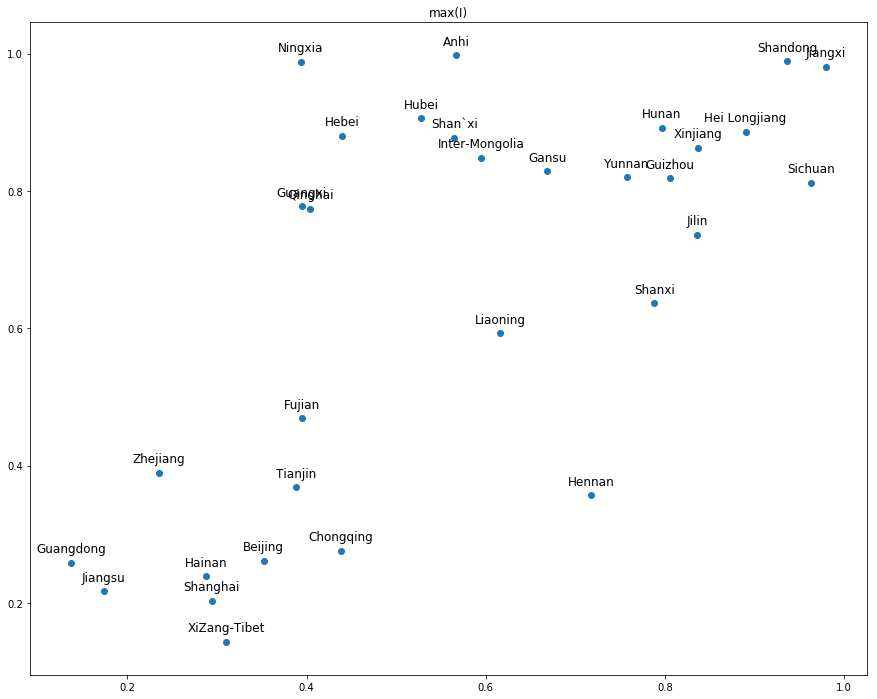

In [13]:
plt.figure(figsize=(15,12))
plt.title('max(I)')
plt.scatter(np.array(bb).T[0],np.array(bb).T[1])
for el in range(31):
    plt.text(bb[el][0],bb[el][1]+0.015,regions[el], horizontalalignment='center',fontsize=12,color='black')

plt.show()

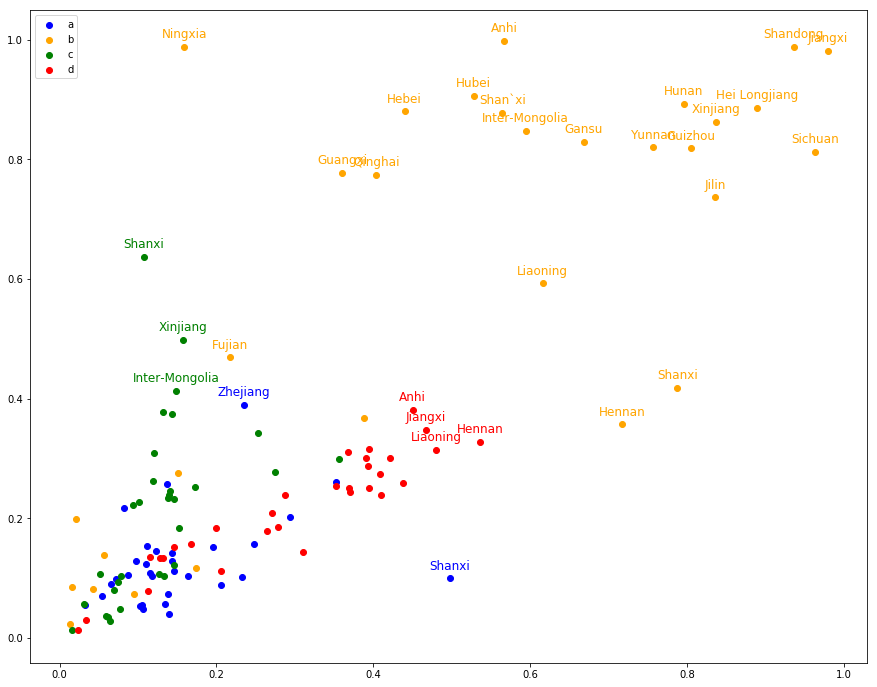

In [14]:
plt.figure(figsize=(15,12))
dd=np.array(dd)
colors=['blue','orange','green','red']
for el in range(4):
    plt.scatter(dd[:,0,el],dd[:,1,el],color=colors[el])
plt.legend(['a','b','c','d'])
for el in range(31):
    for xx in range(4):
        if((dd[el][0][xx]>0.45)|(dd[el][1][xx]>0.38)):
            plt.text(dd[el][0][xx],dd[el][1][xx]+0.015,regions[el], horizontalalignment='center',fontsize=12,color=colors[xx])

plt.show()

In [29]:
reader = codecs.getreader("utf-8")
f = urlopen('https://raw.githubusercontent.com/longwosion/geojson-map-china/master/china.json')
geometry = json.load(reader(f))
f.close()
names1=['Xinjiang','XiZang-Tibet','Inter-Mongolia','Qinghai','Sichuan','Hei Longjiang','Gansu','Yunnan','Guangxi','Hunan',
 'Shan`xi','Guangdong','Jilin','Hebei','Hubei','Guizhou','Shandong','Jiangxi','Hennan','Liaoning','Shanxi','Anhi',
 'Fujian','Zhejiang','Jiangsu','Chongqing','Ningxia','Hainan','Beijing','Tianjin','Shanghai']

regs1=[30,25,4,28,22,7,27,24,19,17,26,18,6,2,16,23,14,13,15,5,3,11,12,10,9,21,29,20,0,1,8]



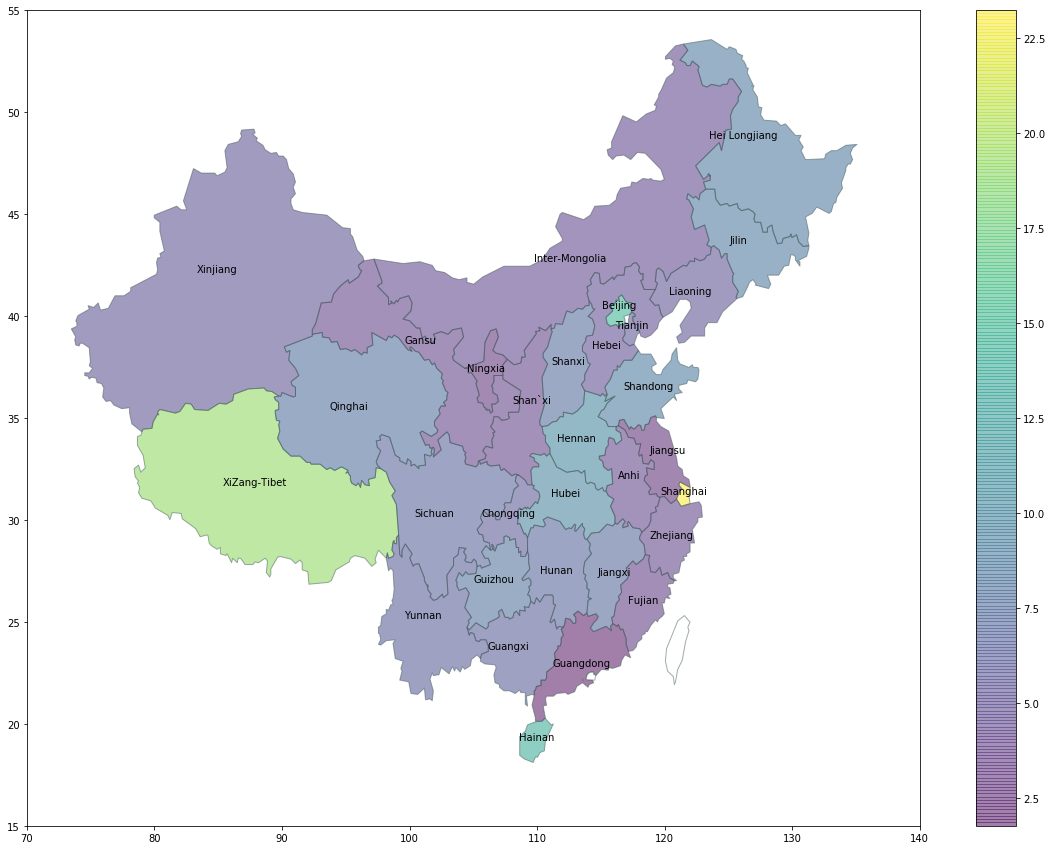

In [63]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=aa[regs1[ii]][0]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

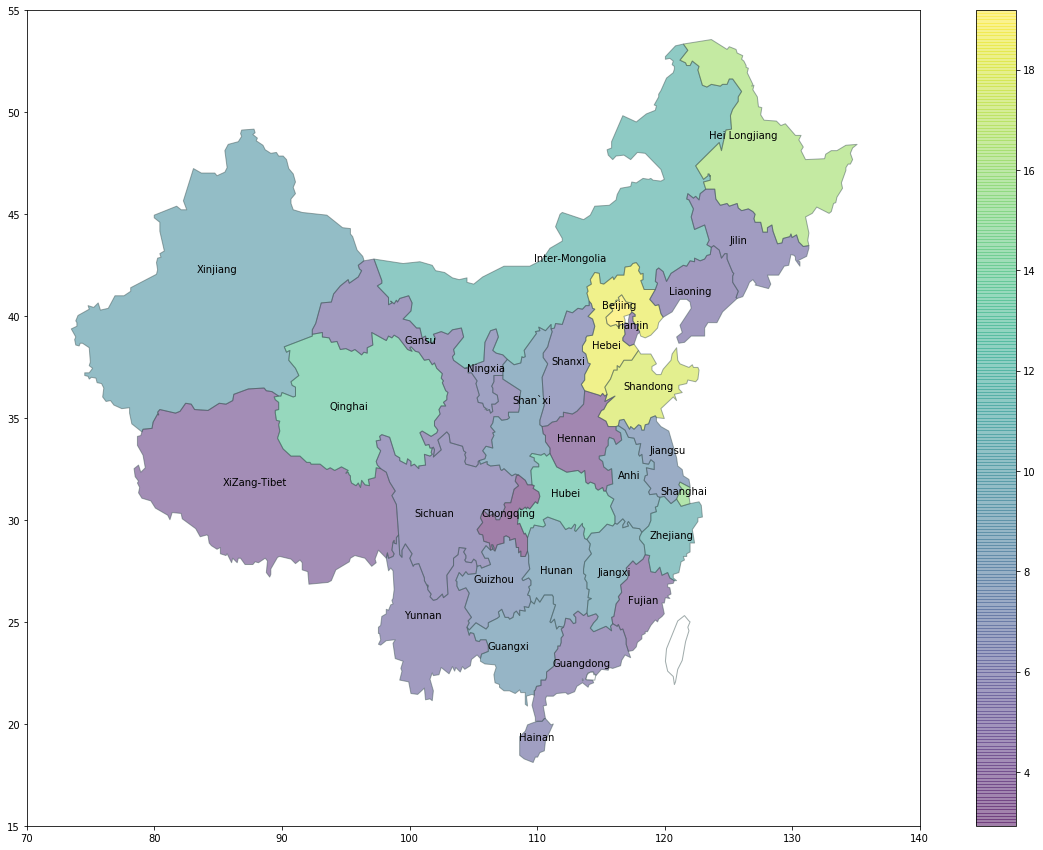

In [64]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=aa[regs1[ii]][1]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

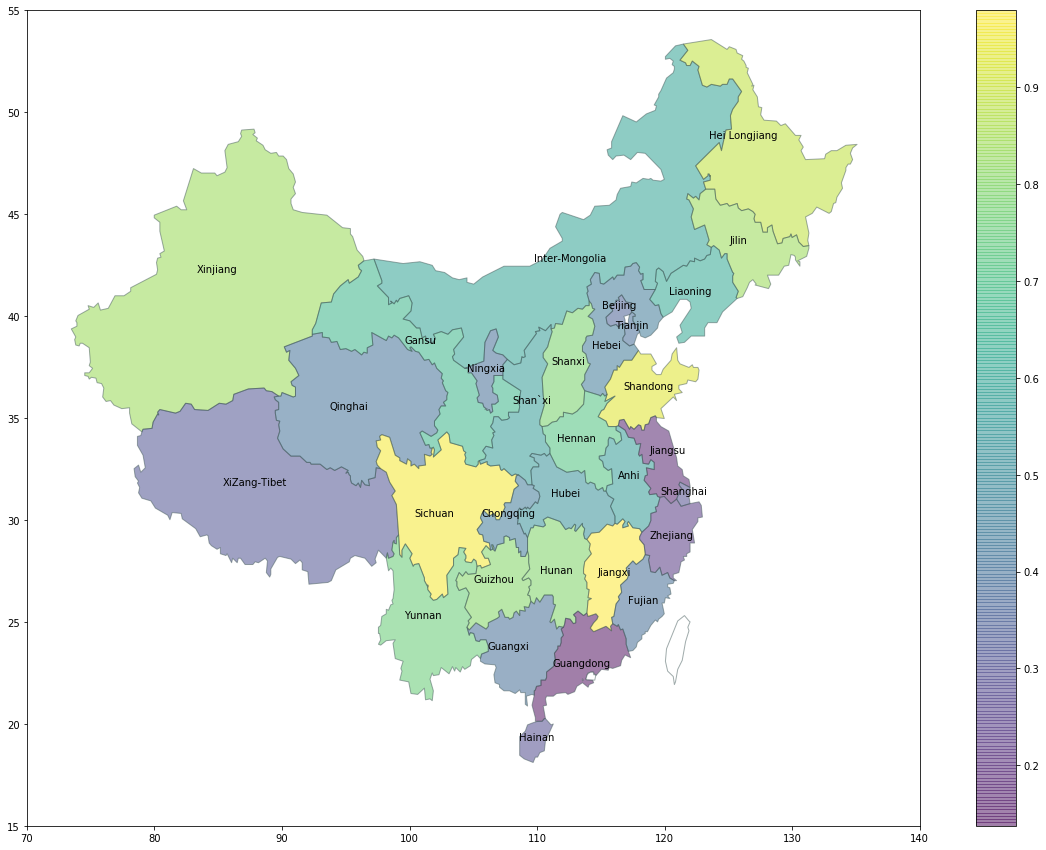

In [65]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=bb[regs1[ii]][0]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

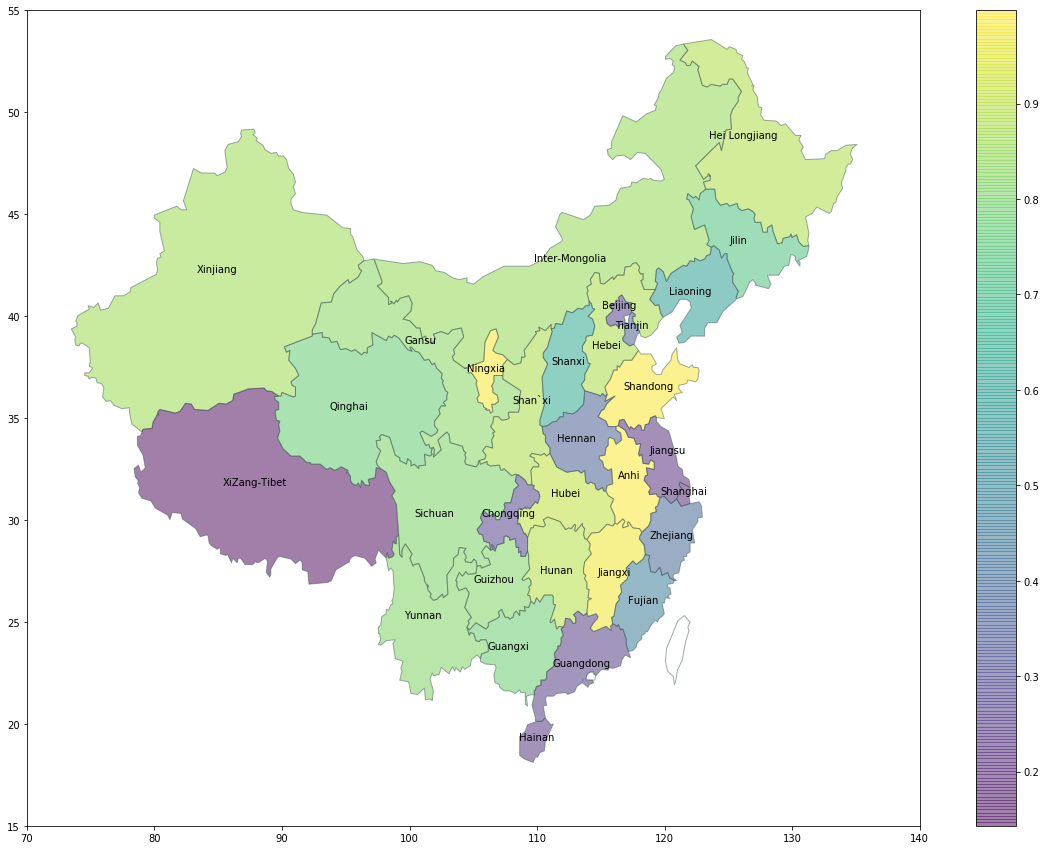

In [66]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=bb[regs1[ii]][1]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

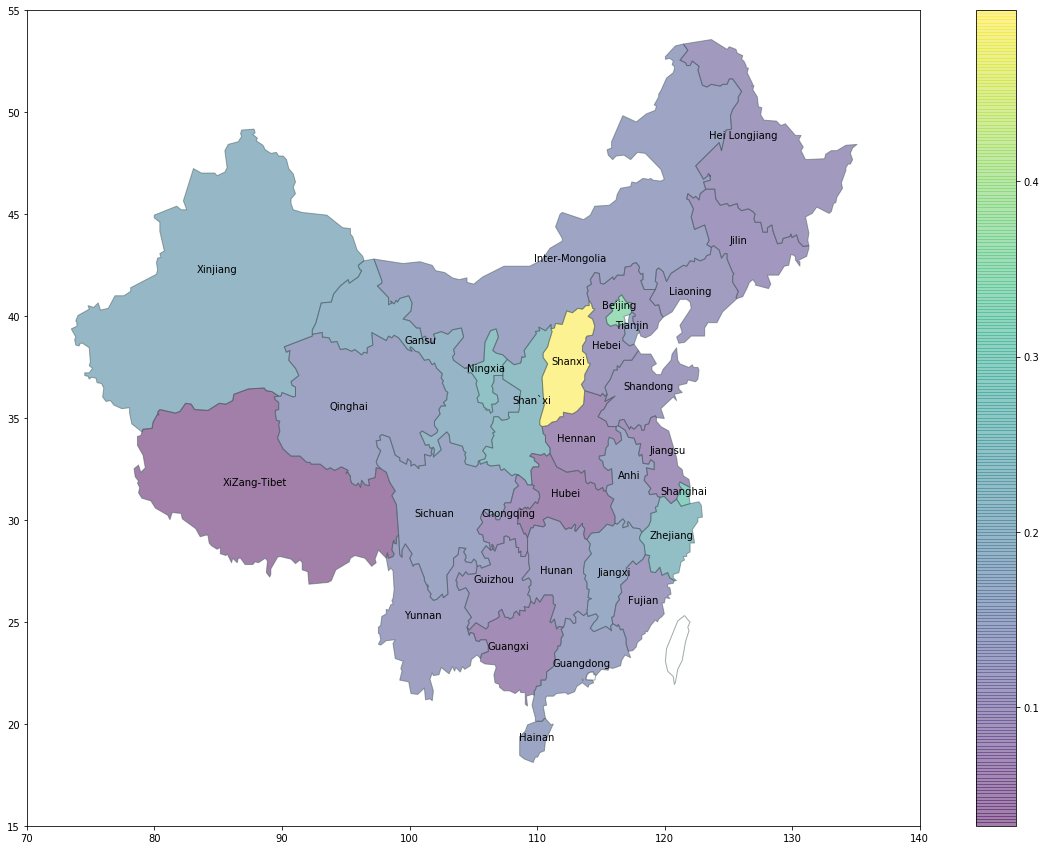

In [67]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][0][0]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

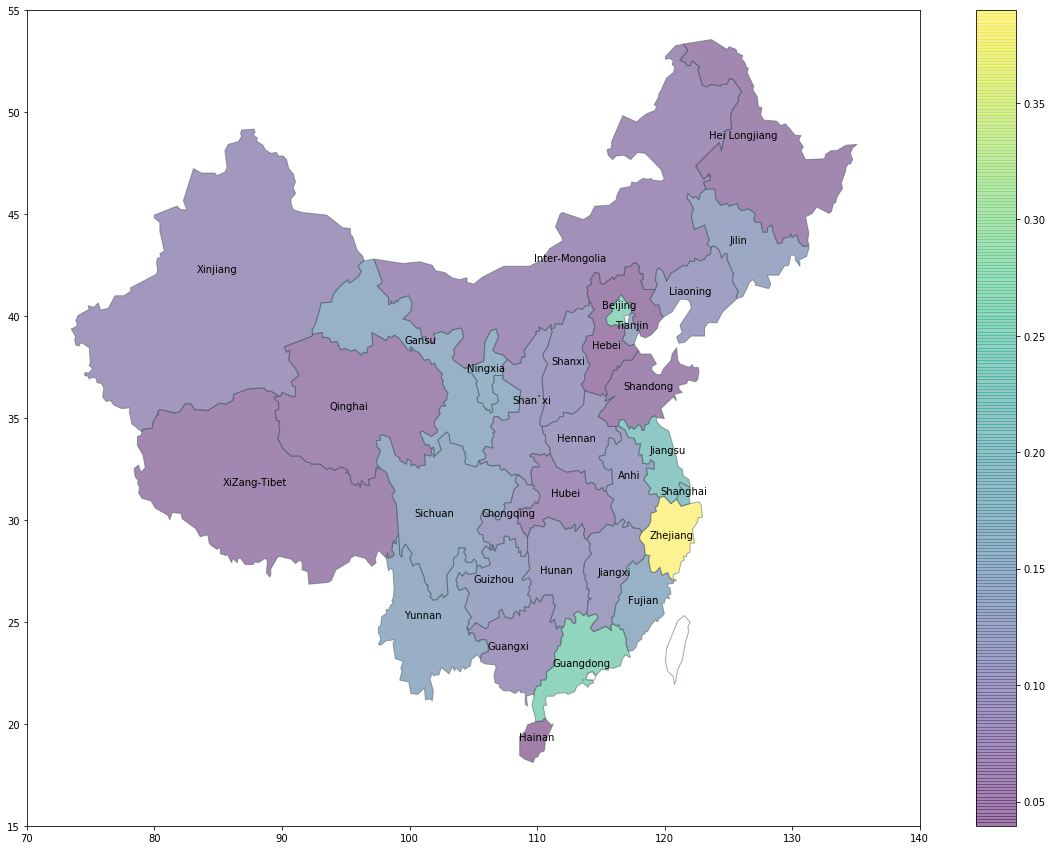

In [68]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][1][0]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

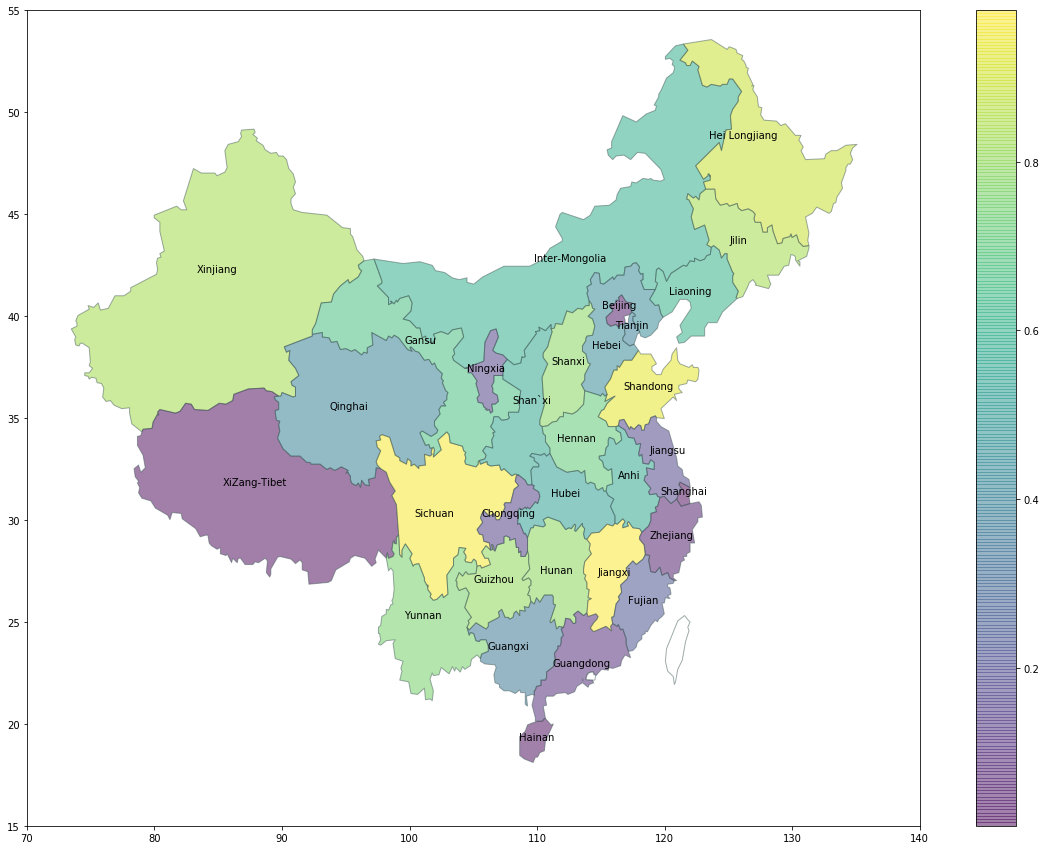

In [69]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][0][1]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

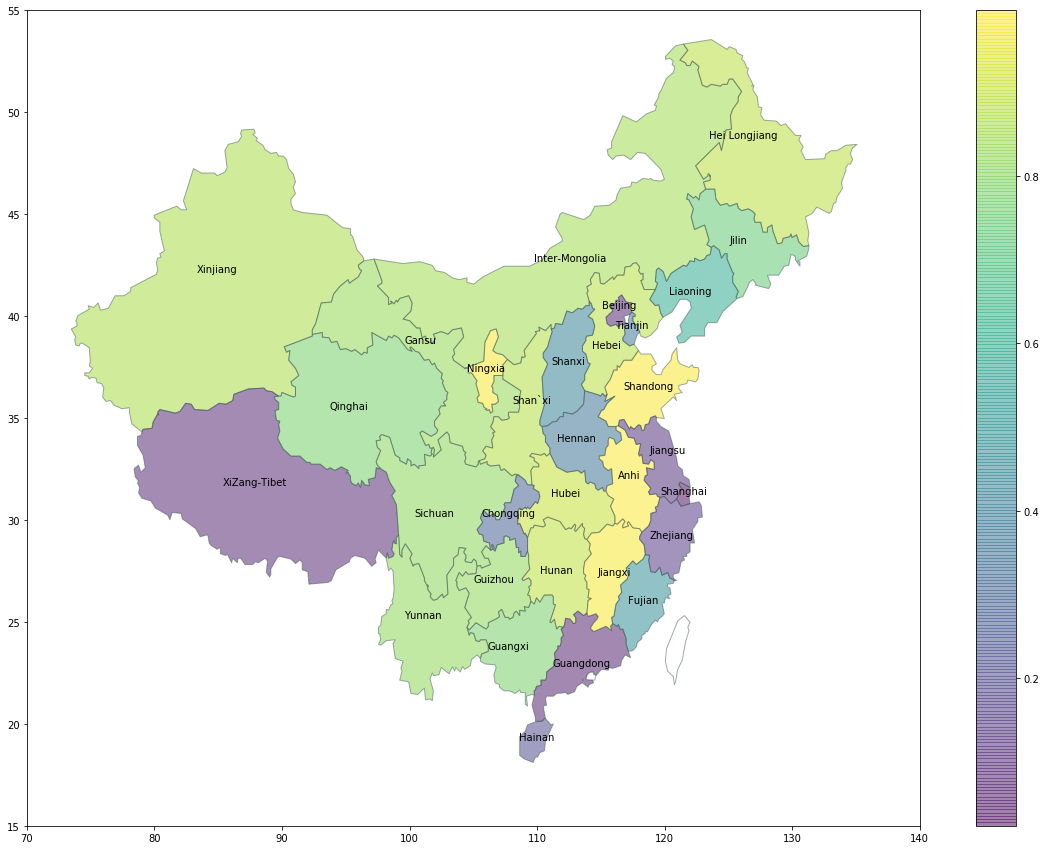

In [70]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][1][1]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

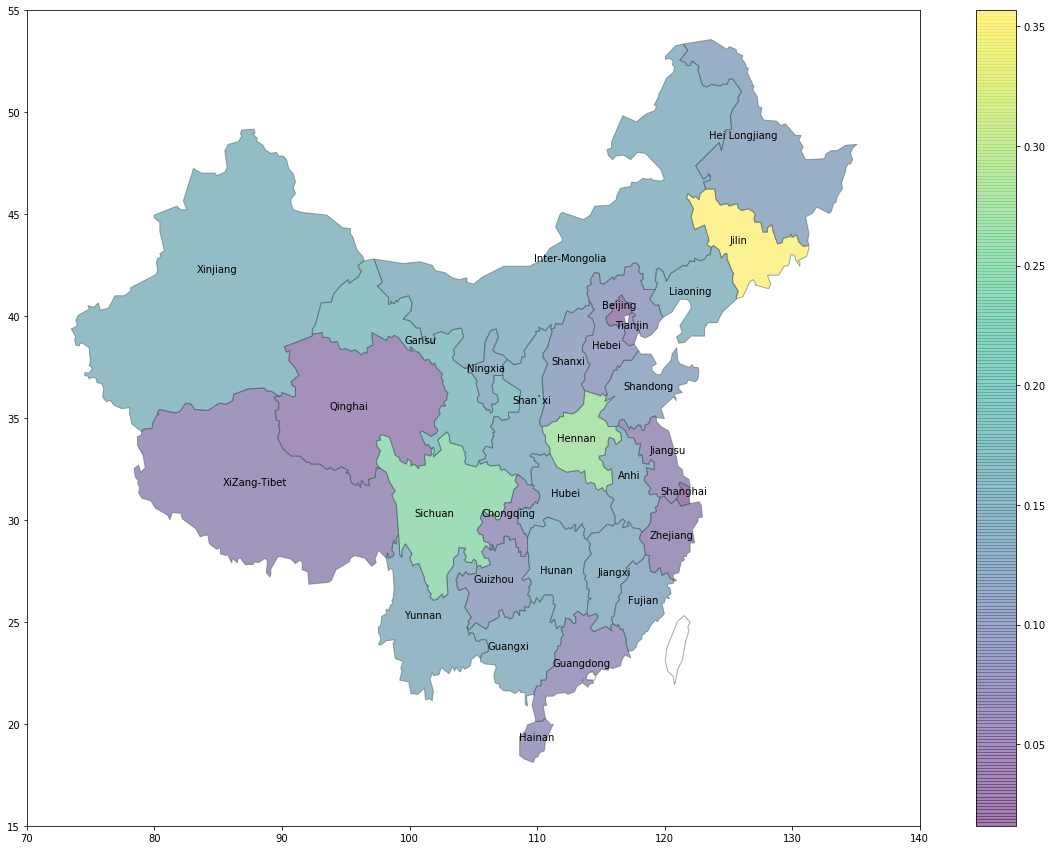

In [71]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][0][2]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

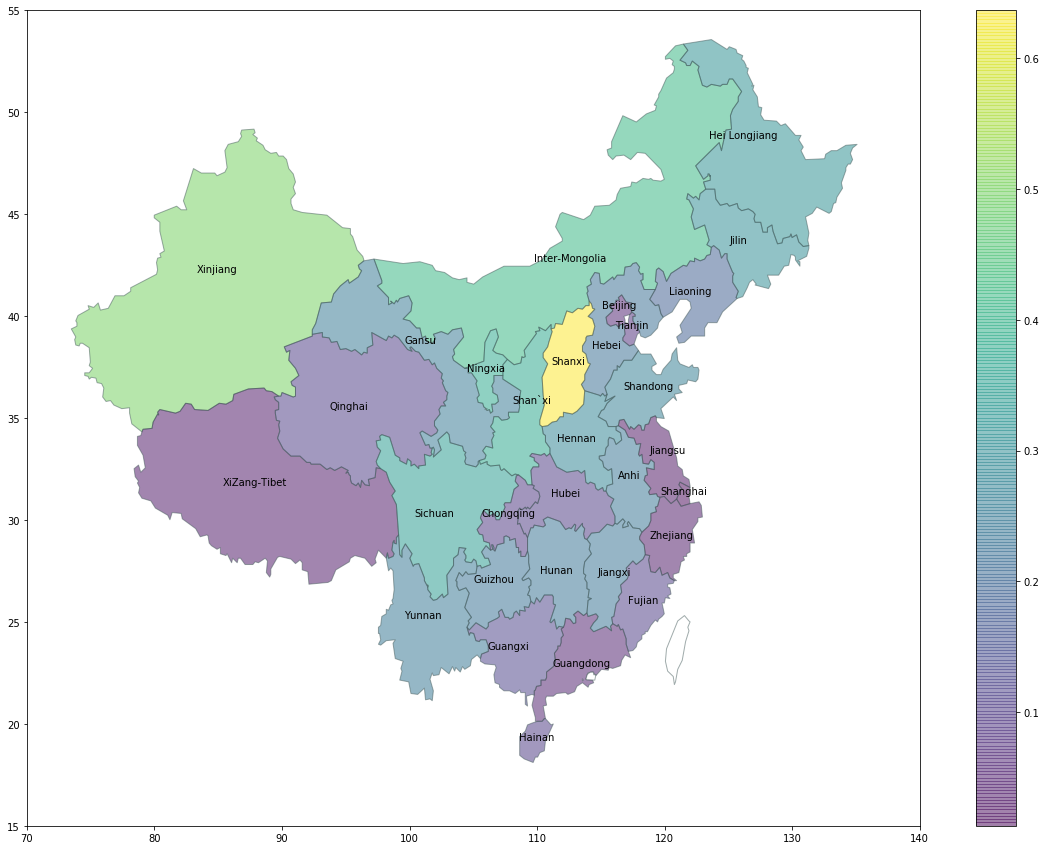

In [72]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][1][2]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

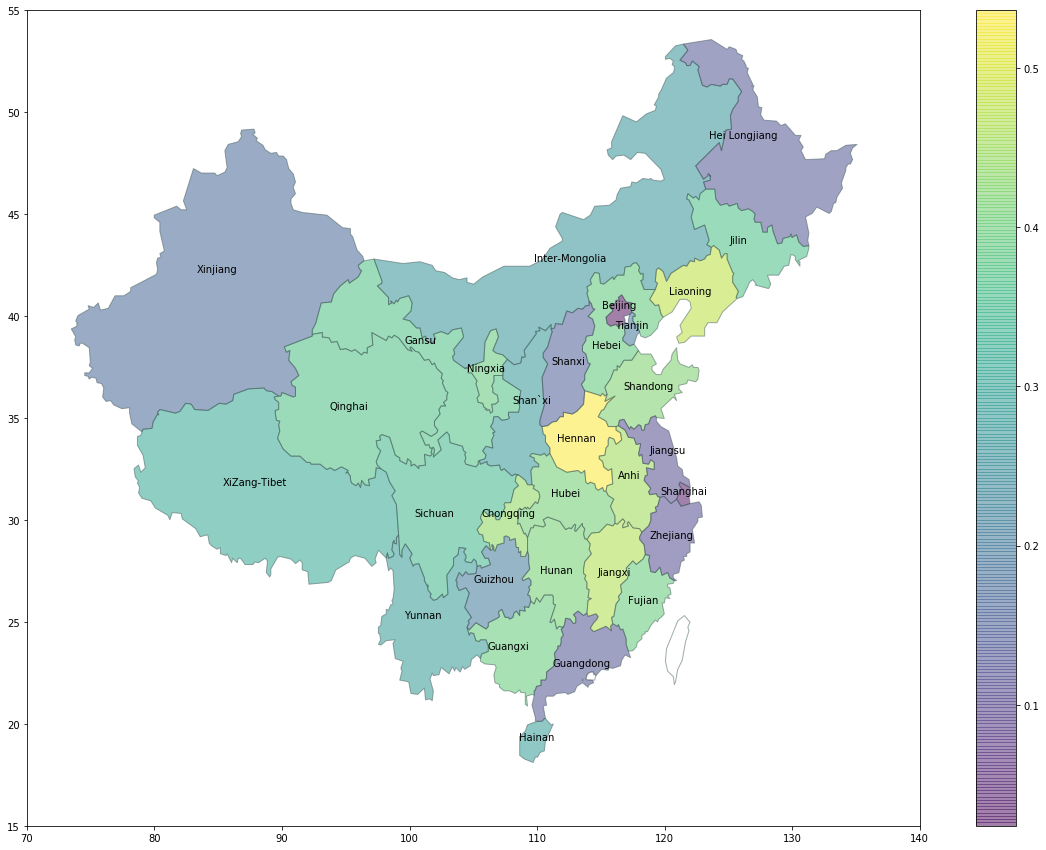

In [73]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][0][3]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

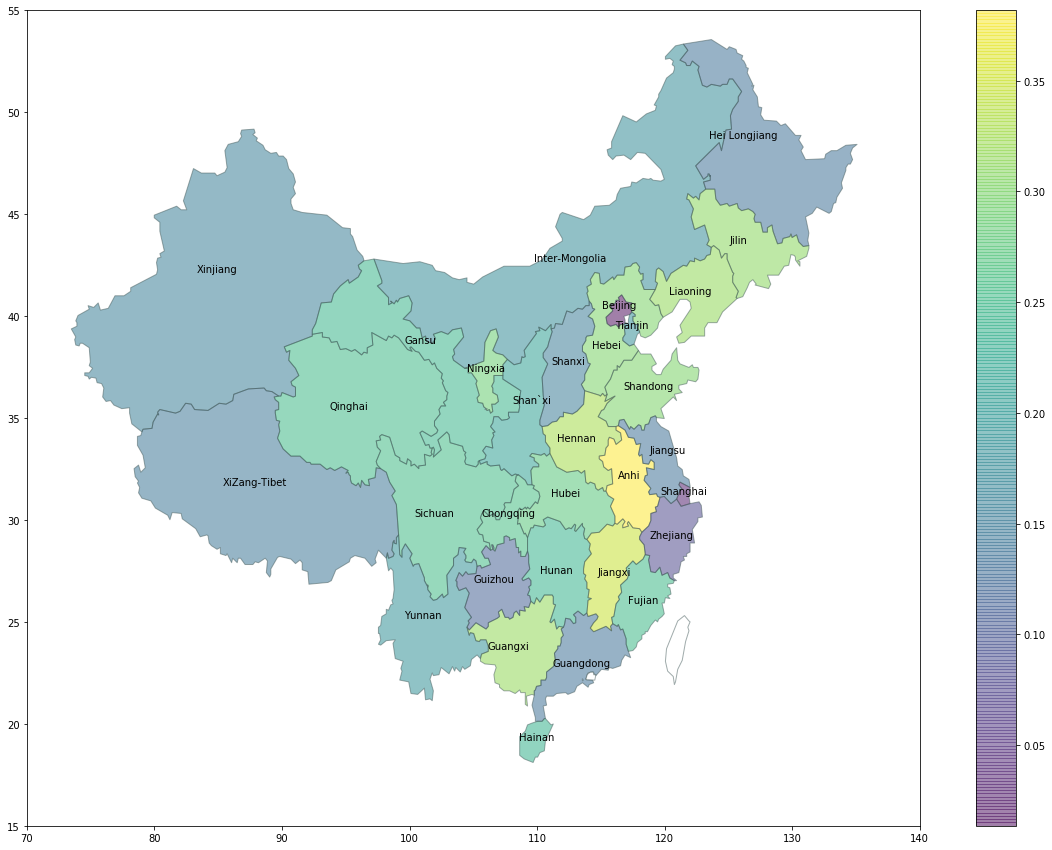

In [74]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=dd[regs1[ii]][1][3]
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

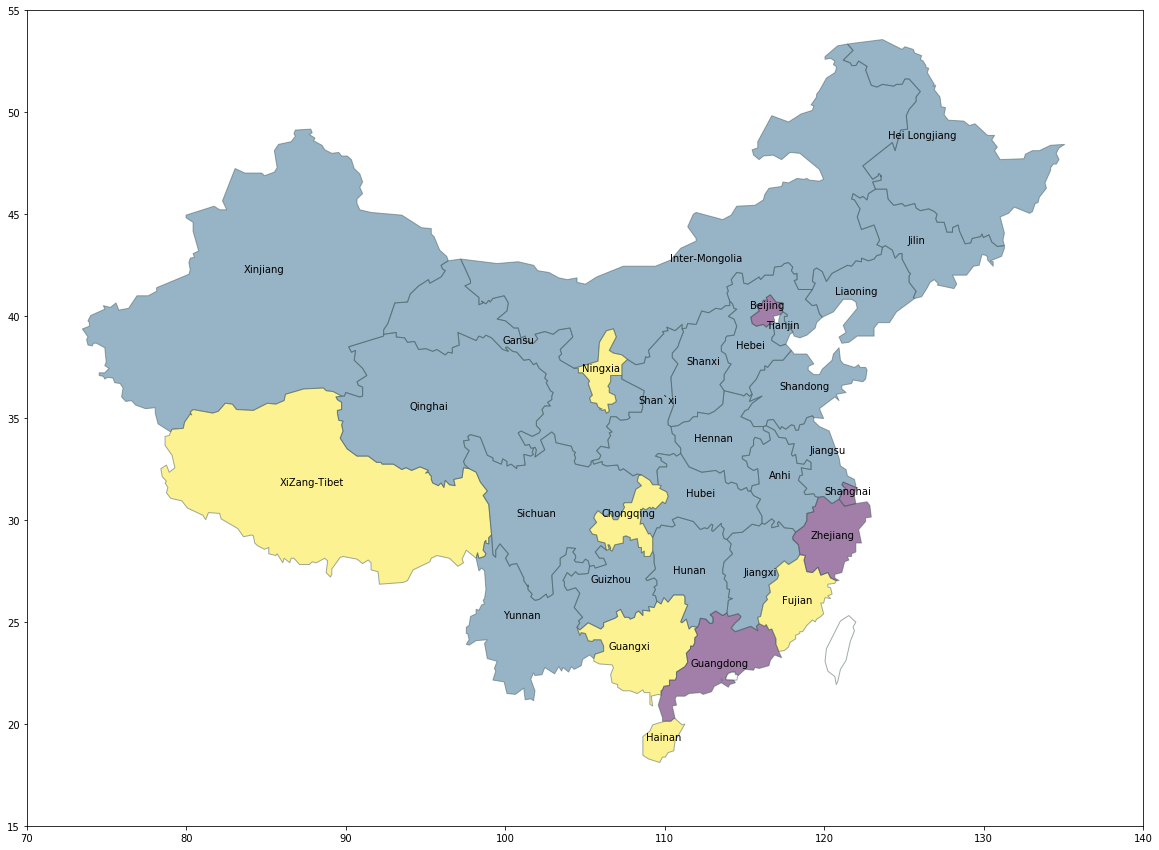

In [77]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][0])
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
#plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

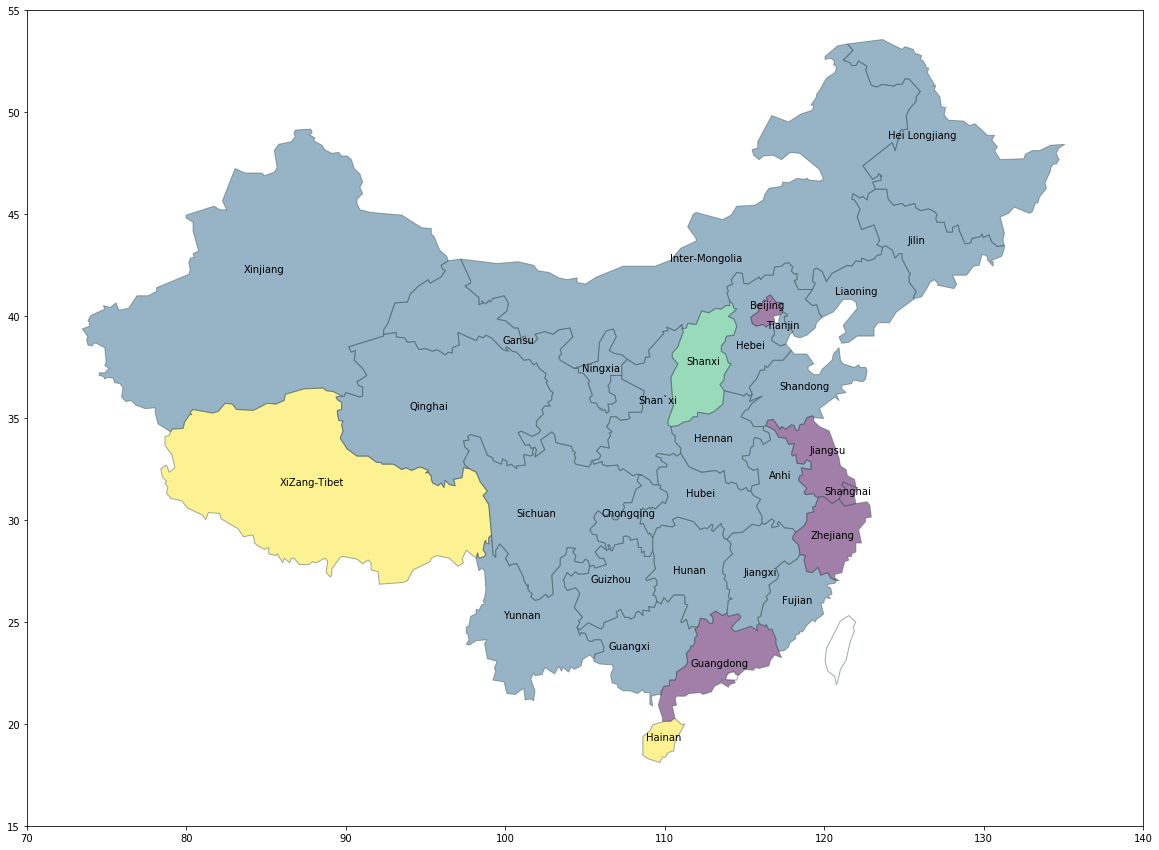

In [78]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
#plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

In [79]:
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas2r=np.array([np.sum(mas2[rrr==el2]) for el2 in range(31)])
mas4r=np.abs(mas1r-mas1r.T)
mas3r=np.max(mas4r)-mas4r
mas4r1=np.abs(mas1r+mas1r.T)
mas3r1=np.max(mas4r1)-mas4r1


In [89]:
def coords(el):
    koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
    koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])
    ll1=locs[el][0]
    ll2=locs[el][1]
    if el==2:
        ll2-=0.07/koef2
    if el==28:
        ll2+=0.003/koef2
    if el==13:
        ll2-=0.02/koef2
    if el==6:
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if el==24:
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    return (ll1,ll2)

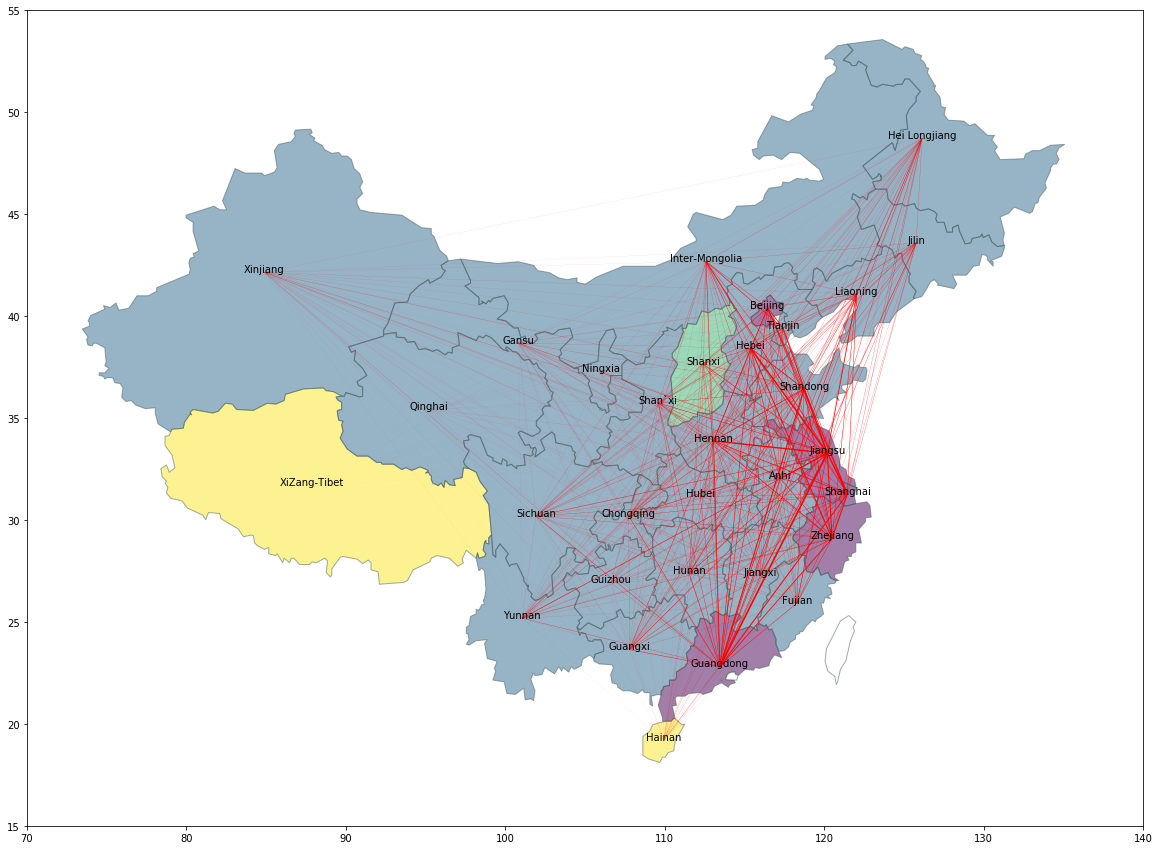

In [91]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(rrr)
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
#plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)


koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for el1 in range(30):
    for el2 in range(el1,31):
        rrr=mas4r1[regs1[el1],regs1[el2]]
        cd1=coords(el1)
        cd2=coords(el2)
        plt.plot([cd1[0],cd2[0]], [cd1[1],cd2[1]], color='red',linewidth=(rrr/4000000))



for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

In [20]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE


In [39]:
embedding = TSNE(n_components=2)
X_transformed = embedding.fit_transform(np.array(dd).reshape(-1,8))
X_transformed.shape

(31, 2)

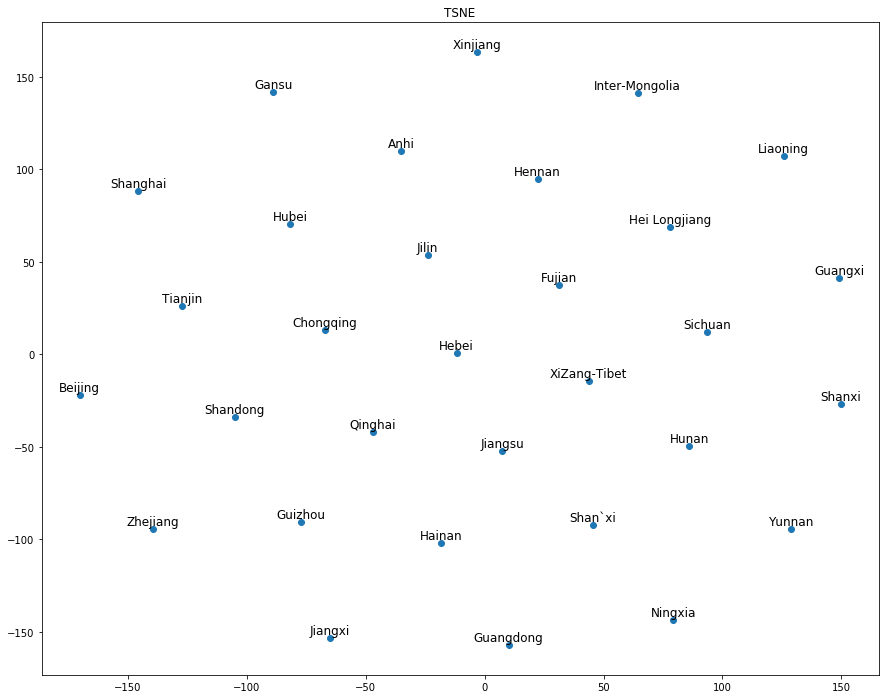

In [40]:
plt.figure(figsize=(15,12))
plt.title('TSNE')
plt.scatter(X_transformed.T[0],X_transformed.T[1])
for el in range(31):
    plt.text(X_transformed[el][0],X_transformed[el][1]+2,regions[el], horizontalalignment='center',fontsize=12,color='black')

plt.show()

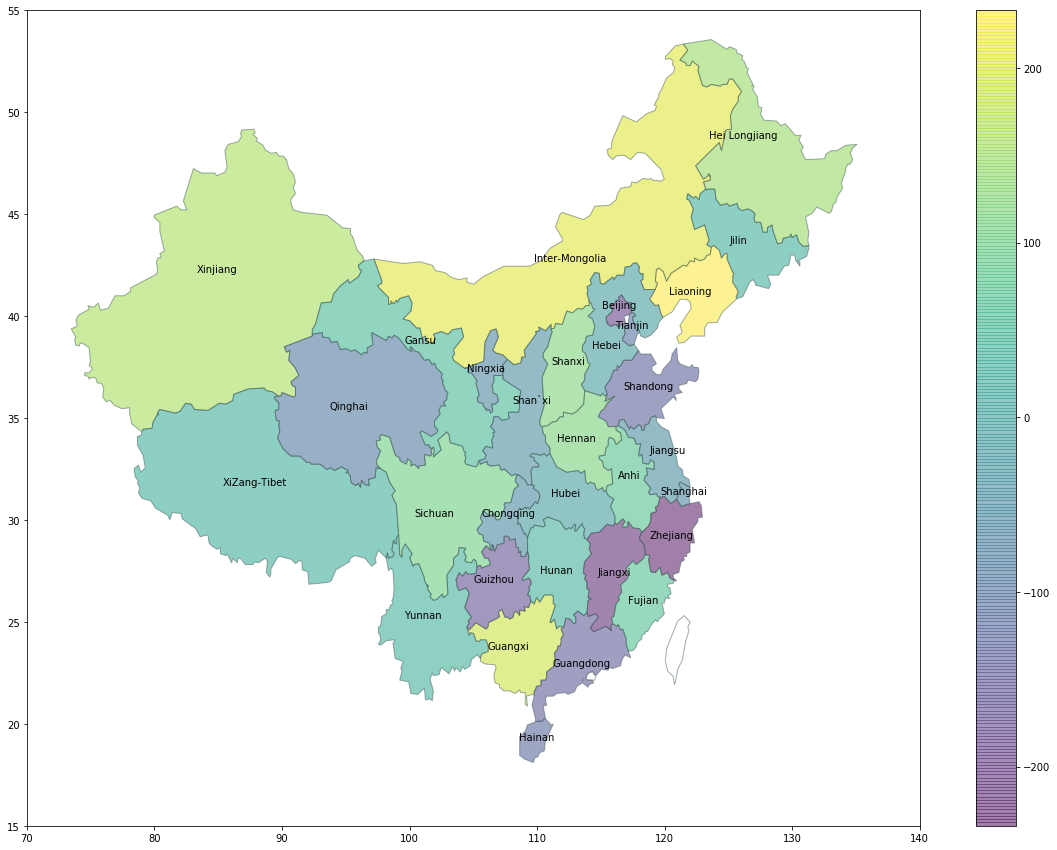

In [41]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(np.sum(X_transformed[regs1[ii]]))
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

In [33]:
from sklearn.decomposition import PCA
embedding = PCA(n_components=2)
X_transformed = embedding.fit_transform(np.array(dd).reshape(-1,8))
X_transformed.shape

(31, 2)

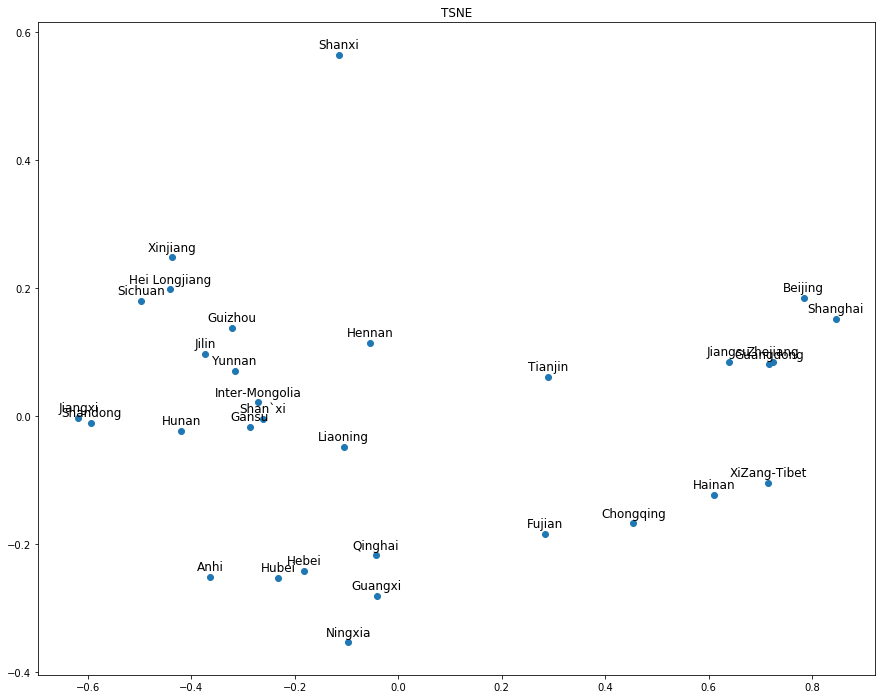

In [36]:
plt.figure(figsize=(15,12))
plt.title('TSNE')
plt.scatter(X_transformed.T[0],X_transformed.T[1])
for el in range(31):
    plt.text(X_transformed[el][0],X_transformed[el][1]+0.01,regions[el], horizontalalignment='center',fontsize=12,color='black')

plt.show()

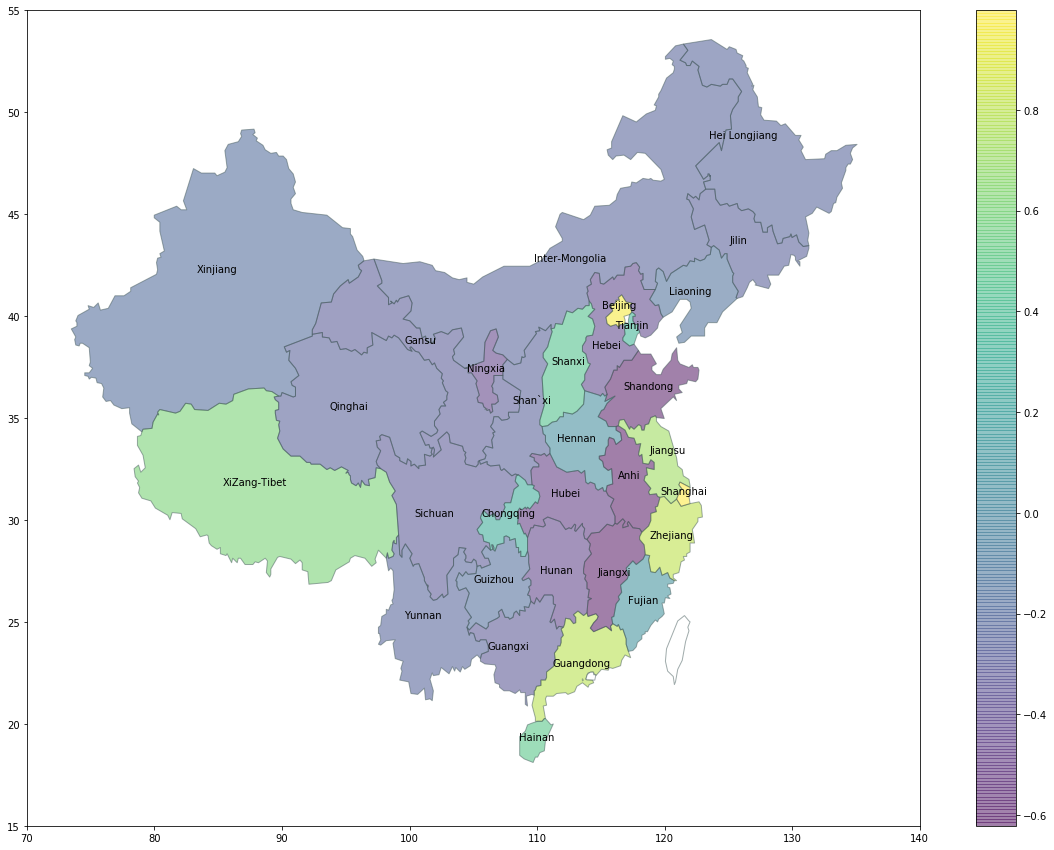

In [38]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(np.sum(X_transformed[regs1[ii]]))
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

In [42]:
from sklearn import mixture
raic=float("inf")
rkols=0
model=0
for kols in range(1,20):
    clf = mixture.GaussianMixture(n_components=kols, random_state=0)
    clf.fit(np.array(dd).reshape(-1,8))
    rraic=clf.aic(np.array(dd).reshape(-1,8))
    print ('Для {} score={}'.format(kols,rraic))
    if rraic<raic:
        raic=rraic
        rkols=kols
        model=clf


Для 1 score=-420.9548302619911
Для 2 score=-512.1111731533229
Для 3 score=-568.599720011302
Для 4 score=-671.1104408755457
Для 5 score=-724.140526071091
Для 6 score=-914.6508007896944
Для 7 score=-1007.745913529694
Для 8 score=-1025.0447929117613
Для 9 score=-1123.07106379467
Для 10 score=-1103.8305509321087
Для 11 score=-1085.1991934880361
Для 12 score=-1061.3549523554952
Для 13 score=-1072.7812636273802
Для 14 score=-1054.504308711073
Для 15 score=-1034.2396909970826
Для 16 score=-978.2167864968592
Для 17 score=-938.5821626643683
Для 18 score=-881.475617756761
Для 19 score=-826.7757654631387


In [45]:
clf = mixture.GaussianMixture(n_components=13, random_state=0)
clf.fit(np.array(dd).reshape(-1,8))
res=clf.predict(np.array(dd).reshape(-1,8))
res

array([ 2,  0,  4,  5,  3,  3, 12, 11,  2,  9,  2,  3,  0,  1,  1,  7,  4,
        1,  9,  4,  6,  0, 12,  8,  8,  6,  3,  3,  4, 10, 11],
      dtype=int64)

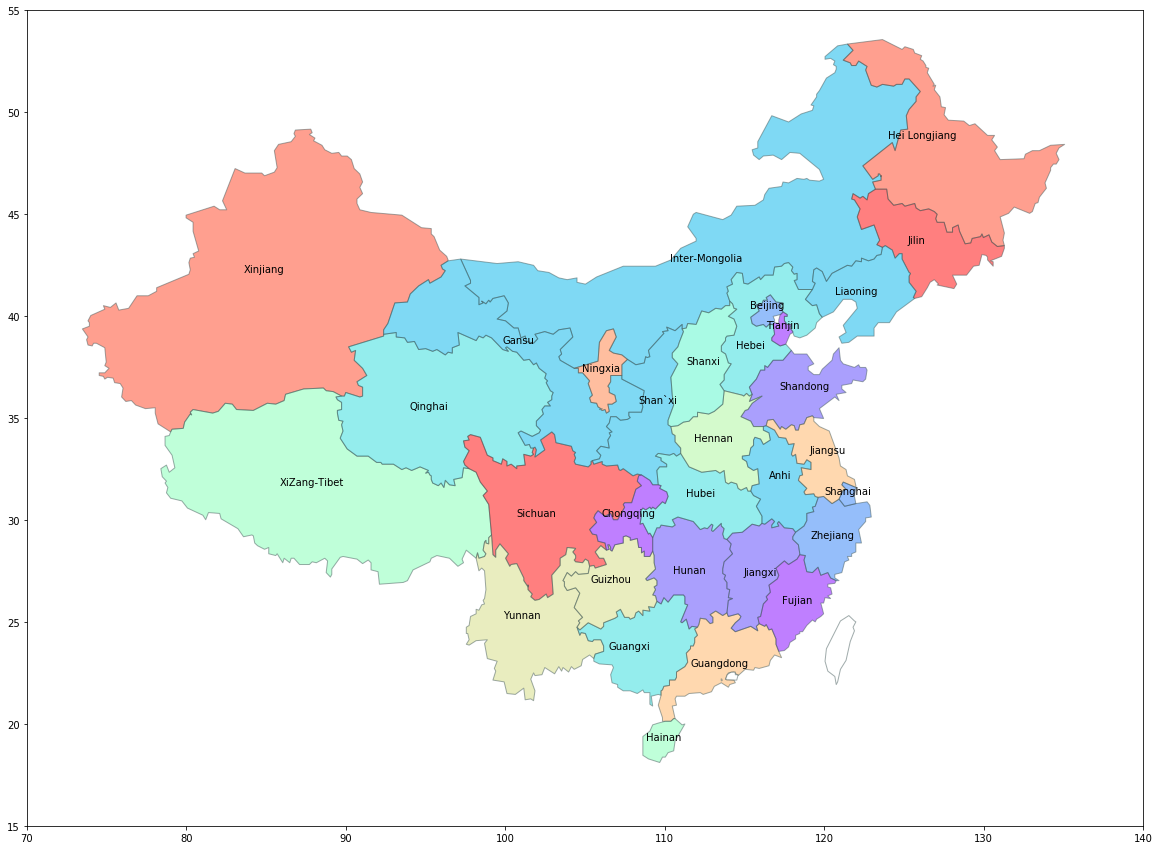

In [48]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(res[regs1[ii]])
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, cmap=rainbow, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
#plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 

In [49]:
import hdbscan


In [85]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True, leaf_size=1)
clusterer.fit(np.array(dd).reshape(-1,8))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=1,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=2, min_samples=None, p=None,
    prediction_data=False)

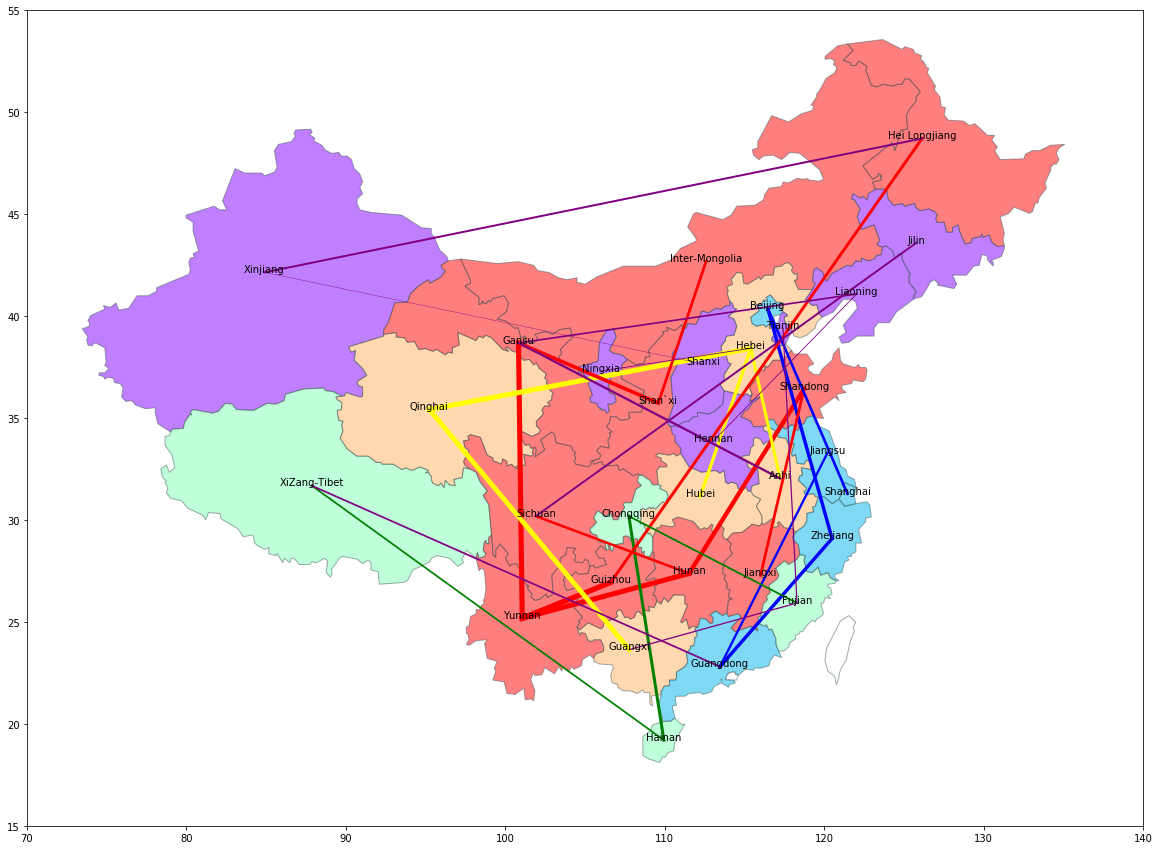

In [120]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if not (ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.argmax(dd[regs1[ii]][1])
        colors.append(clusterer.labels_[regs1[ii]])
        #colors.append(1)
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, cmap=rainbow, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
#plt.colorbar(p)
ppatches=[]
iii=-1
for feature in geometry['features']:
    #country_name = feature['properties']['name']
    #translator = Translator()
    #ccn=translator.translate(country_name,dest='en').text
    iii+=1
    ccn=names3[iii]
    if ccn in ['Taiwan Province','Hong Kong Special Administrative Region', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

clrs=['blue','green','yellow','red']

for el1 in clusterer.minimum_spanning_tree_.to_numpy():
    rrr=0.4/el1[2]
    cd1=coords(np.where(np.array(regs1)==el1[0])[0][0])
    cd2=coords(np.where(np.array(regs1)==el1[1])[0][0])
    if (clusterer.labels_[int(el1[0])]==clusterer.labels_[int(el1[1])]) & (clusterer.labels_[int(el1[0])]>-1):
        plt.plot([cd1[0],cd2[0]], [cd1[1],cd2[1]], color=clrs[clusterer.labels_[int(el1[1])]],linewidth=(rrr**2))
    else:
        plt.plot([cd1[0],cd2[0]], [cd1[1],cd2[1]], color='purple',linewidth=(rrr**2))


koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    ll1=loc[0]
    ll2=loc[1]
    if nam=='Inter-Mongolia':
        l2-=0.07
        ll2-=0.07/koef2
    if nam=='Beijing':
        l2+=0.003
        ll2+=0.003/koef2
    if nam=='Hebei':
        l2-=0.02
        ll2-=0.02/koef2
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
        ll1+=0.01/koef1
        ll2+=0.01/koef2
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
        ll1+=0.012/koef1
        ll2+=0.007/koef2
    plt.text(ll1,ll2,nam,horizontalalignment='center')
#    ax1=plt.axes([l1,l2,0.2,0.3])
#    rrr=np.array(df1[df1.index==nam])[0]
#    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
#    ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

#ax1=plt.axes([0.55,0.1,0.2,0.3])
#rrr=np.sum(np.array(df1),axis=0)
#ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
#        labels=['Efficiency','Potential'])
#ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.show() 
